<a href="https://colab.research.google.com/github/shailavij/Keras-Functional-API-Projects/blob/master/Keras_Function_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 1.x
import tensorflow as tf
print(tf.__version__)

TensorFlow 1.x selected.
1.15.2


# The Keras functional API

 ## Coding tutorials
 #### [1. Multiple inputs and outputs](#coding_tutorial_1)
 #### [2. Tensors and Variables](#coding_tutorial_2)
 #### [3. Accessing model layers](#coding_tutorial_3)
 #### [4. Freezing layers](#coding_tutorial_4)

***
<a id="coding_tutorial_1"></a>
## Multiple inputs and 2 out

With multiple feature, preducting 2 output

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Load the acute inflammations dataset

The `acute inflammations` was created by a medical expert as a data set to test the expert system, which will perform the presumptive diagnosis of two diseases of the urinary system. You can find out more about the dataset [here](https://archive.ics.uci.edu/ml/datasets/Acute+Inflammations).

Attribute information:

Inputs:
- Temperature of patient : 35C-42C
- Occurrence of nausea : yes/no
- Lumbar pain : yes/no
- Urine pushing (continuous need for urination) : yes/no
- Micturition pains : yes/no
- Burning of urethra, itch, swelling of urethra outlet : yes/no

Outputs:
- decision 1: Inflammation of urinary bladder : yes/no
- decision 2: Nephritis of renal pelvis origin : yes/no

#### Import the data

The dataset required for this tutorial can be downloaded from the following link:

https://drive.google.com/open?id=1CDPQSqpI7OjNIgOERWaI-BlQMI6vjzb9

You should store this file in Drive for use in this Colab notebook.

#### Load the data

In [0]:
from keras.layers import Conv1D, Input, Dense
from keras.models import Model

IP=Input(shape=(10,1))
h= Conv1D(3,5,activation='relu')(IP)
out=Dense(1, activation='sigmoid')(h)
model = Model (IP,out)

print(model.layers[2].weights)
print(model.layers[1].input)
print(model.layers[1].output)

[<tf.Variable 'dense_20/kernel:0' shape=(3, 1) dtype=float32>, <tf.Variable 'dense_20/bias:0' shape=(1,) dtype=float32>]
Tensor("input_23:0", shape=(?, 10, 1), dtype=float32)
Tensor("conv1d_23/Relu:0", shape=(?, 6, 3), dtype=float32)


In [0]:
# Run this cell to connect to your Drive folder

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!pwd

/content


In [0]:
%cd /content/drive/My Drive/DL_DATASet/VQA/Preprocessed Data/

/content/drive/My Drive/DL_DATASet/VQA/Preprocessed Data


In [0]:
!pwd

/content


In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
# Load the dataset

from sklearn.model_selection import train_test_split

df = pd.read_csv('diagnosis.csv')
dataset = df.values
df.head(10)
df.shape

(120, 8)

In [0]:
# Build train and test data splits

X_train, X_test, Y_train, Y_test = train_test_split(dataset[:,:6], dataset[:,6:], test_size=0.33)
print("X_train", X_train.shape)
print("x_test",X_test.shape)
print("y_train", Y_train.shape)
print("y_test",Y_test.shape)

X_train (80, 6)
x_test (40, 6)
y_train (80, 2)
y_test (40, 2)


In [0]:
# Assign training and testing inputs/outputs to variables

temp_train, nocc_train, lumbp_train, up_train, mict_train, bis_train = np.transpose(X_train)
temp_test, nocc_test, lumbp_test, up_test, mict_test, bis_test = np.transpose(X_test)

inflam_train, nephr_train = Y_train[:, 0], Y_train[:, 1]
inflam_test, nephr_test = Y_test[:, 0], Y_test[:, 1]




#### Build the model

In [0]:
# Build the input layers

from tensorflow.keras import Input, layers
from keras import Model

shape_IP=(1,)
temperature= Input(shape=shape_IP,name='temp')
nausea_occurence= Input(shape=shape_IP,name='nocc')
lumbar_pain= Input(shape=shape_IP,name='lumbp')
urine_pushing= Input(shape=shape_IP,name='up')
micturition_pains= Input(shape=shape_IP,name='mict')
bis= Input(shape=shape_IP,name='bis')



In [0]:
# Create a list of all the inputs

list_inputs = [temperature, nausea_occurence, lumbar_pain, urine_pushing, 
               micturition_pains, bis]

In [0]:
# Merge all input features into a single large vector

x=layers.concatenate(list_inputs)

In [0]:
# Use a logistic regression classifier for disease prediction

inflammation_pred= layers.Dense(1,activation='sigmoid',name='inflam')(x)
nephritis_pred= layers.Dense(1,activation='sigmoid',name='nephr')(x)


In [0]:
# Create a list of all the outputs

list_outputs = [inflammation_pred, nephritis_pred]

In [0]:
# Create the model object
model=tf.keras.Model(inputs=list_inputs,outputs=list_outputs)


#### Plot the model

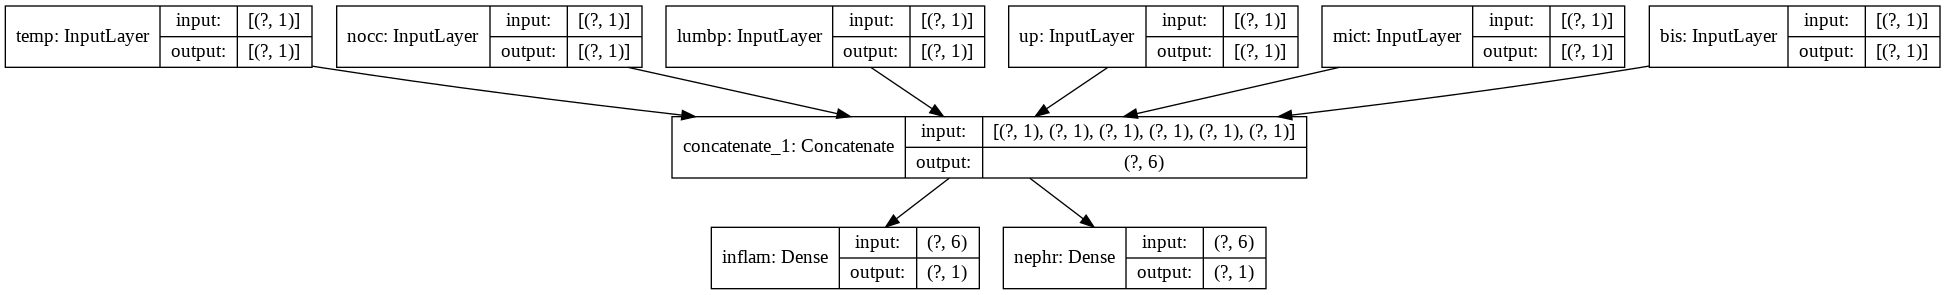

In [0]:
# Display the multiple input/output model
tf.keras.utils.plot_model(model,'multiinput_output.png',show_shapes=True)


#### Compile the model

In [0]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.RMSprop(1e-3),
              loss=['binary_crossentropy','binary_crossentropy'],
              metrics={'inflam':['acc'],
                       'nephr':['acc']},
              loss_weights=[1.,1])
              


#### Fit the model 

In [0]:
# Define training inputs and outputs

inputs_train = {'temp': temp_train, 'nocc': nocc_train, 'lumbp': lumbp_train,
                'up': up_train, 'mict': mict_train, 'bis': bis_train}

outputs_train = {'inflam': inflam_train, 'nephr': nephr_train}

In [0]:
# Train the model
history = model.fit(inputs_train,outputs_train,
                    epochs=1000,
                    batch_size=128,
                    verbose= True)


Train on 80 samples
Epoch 1/1000
80/80 [==============================] - 0s 1ms/sample - loss: 0.6829 - inflam_loss: 0.0673 - nephr_loss: 0.6156 - inflam_acc: 1.0000 - nephr_acc: 0.6375
Epoch 2/1000
80/80 [==============================] - 0s 27us/sample - loss: 0.6833 - inflam_loss: 0.0675 - nephr_loss: 0.6158 - inflam_acc: 1.0000 - nephr_acc: 0.5625
Epoch 3/1000
80/80 [==============================] - 0s 22us/sample - loss: 0.6808 - inflam_loss: 0.0671 - nephr_loss: 0.6137 - inflam_acc: 1.0000 - nephr_acc: 0.6375
Epoch 4/1000
80/80 [==============================] - 0s 25us/sample - loss: 0.6800 - inflam_loss: 0.0670 - nephr_loss: 0.6130 - inflam_acc: 1.0000 - nephr_acc: 0.6375
Epoch 5/1000
80/80 [==============================] - 0s 21us/sample - loss: 0.6793 - inflam_loss: 0.0670 - nephr_loss: 0.6123 - inflam_acc: 1.0000 - nephr_acc: 0.6375
Epoch 6/1000
80/80 [==============================] - 0s 22us/sample - loss: 0.6787 - inflam_loss: 0.0669 - nephr_loss: 0.6118 - inflam_acc: 

#### Plot the learning curves

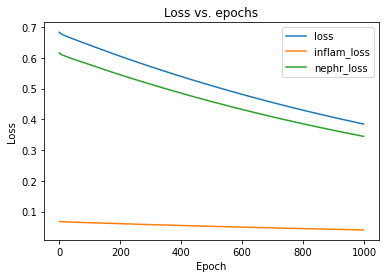

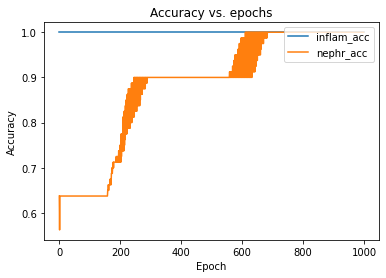

In [0]:
# Plot the training accuracy

acc_keys = [k for k in history.history.keys() if k in ('inflam_acc', 'nephr_acc')] 
loss_keys = [k for k in history.history.keys() if not k in acc_keys]

for k, v in history.history.items():
    if k in acc_keys:
        plt.figure(1)
        plt.plot(v)
    else:
        plt.figure(2)
        plt.plot(v)

plt.figure(1)
plt.title('Accuracy vs. epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(acc_keys, loc='upper right')

plt.figure(2)
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loss_keys, loc='upper right')

plt.show()

In [0]:
# Evaluate the model



![alt text](https://)***
<a id="coding_tutorial_2"></a>
## Tensors and Variables

In [0]:
import numpy as np
import tensorflow as tf

#### Create Variable objects

In [0]:
# Create Variable objects of different type with tf.Variable

strings = tf.Variable(["Hello world!"], tf.string)
floats  = tf.Variable([3.14159, 2.71828], tf.float64)
ints = tf.Variable([1, 2, 3,6,7], tf.int32, name='myint')
complexs = tf.Variable([25.9 - 7.39j, 1.23 - 4.91j], tf.complex128)

In [0]:
print(strings)
print(floats)
print(ints)
print(complexs)

<tf.Variable 'Variable:0' shape=(1,) dtype=string, numpy=array([b'Hello world!'], dtype=object)>
<tf.Variable 'Variable:0' shape=(2,) dtype=float32, numpy=array([3.14159, 2.71828], dtype=float32)>
<tf.Variable 'myint:0' shape=(5,) dtype=int32, numpy=array([1, 2, 3, 6, 7], dtype=int32)>
<tf.Variable 'Variable:0' shape=(2,) dtype=complex128, numpy=array([25.9 -7.39j,  1.23-4.91j])>


In [0]:
# Initialise a Variable value
s1=tf.Variable([11,12,13], dtype=float)
s2=tf.Variable(["You are the BEST"])
print(s1)
print(s2)



<tf.Variable 'Variable:0' shape=(3,) dtype=float32, numpy=array([11., 12., 13.], dtype=float32)>
<tf.Variable 'Variable:0' shape=(1,) dtype=string, numpy=array([b'You are the BEST'], dtype=object)>


#### Use and modify Variable values

In [0]:
# Use the value of a Variable

v = tf.Variable(0.0)
w = v + 1  # w is a tf.Tensor which is computed based on the value of v.

print(type(w))

<class 'tensorflow.python.framework.ops.EagerTensor'>


In [0]:
# Increment the value of a Variable
v.assign_add(2)
print(v)


<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=2.0>


In [0]:
# Decrement the value of a Variable
v.assign_sub(1)   # assign_sub will subtract value from V
print(v)


<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.0>


#### Create Tensor objects

Create a constant tensor and print its type as well as its shape:

In [0]:
# Create a constant Tensor

x = tf.constant([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(x)
print("dtype:", x.dtype)
print("shape:", x.shape)

tf.Tensor(
[[1 2 3]
 [4 5 6]
 [7 8 9]], shape=(3, 3), dtype=int32)
dtype: <dtype: 'int32'>
shape: (3, 3)


In [0]:
# Obtain the value as a numpy array
x.numpy()  # Will change tensor to numpy




array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]], dtype=int32)

In [0]:
# to convert numpy to tensor
a= tf.convert_to_tensor(x)
a

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]], dtype=int32)>

In [0]:
# Create a Tensor of type float32

s2= tf.Variable([[1.2,2.2] ,  [3.5,4.4], [1,2]])
s2



<tf.Variable 'Variable:0' shape=(3, 2) dtype=float32, numpy=
array([[1.2, 2.2],
       [3.5, 4.4],
       [1. , 2. ]], dtype=float32)>

In [0]:
# Create coefficients

coeffs = np.arange(16)
coeffs

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [0]:
# Initialise shapes
shape1=[8,2]
shape2=[4,4]
shape3=[2,2,2,2]



In [0]:
# Create Tensors of different shape

a = tf.constant(coeffs, shape=shape1)
print("\n a:\n ", a)

b = tf.constant(coeffs, shape=shape2)
print("\n b:\n ", b)

c = tf.constant(coeffs, shape=shape3)
print("\n c:\n ", c)


 a:
  tf.Tensor(
[[ 0  1]
 [ 2  3]
 [ 4  5]
 [ 6  7]
 [ 8  9]
 [10 11]
 [12 13]
 [14 15]], shape=(8, 2), dtype=int64)

 b:
  tf.Tensor(
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]], shape=(4, 4), dtype=int64)

 c:
  tf.Tensor(
[[[[ 0  1]
   [ 2  3]]

  [[ 4  5]
   [ 6  7]]]


 [[[ 8  9]
   [10 11]]

  [[12 13]
   [14 15]]]], shape=(2, 2, 2, 2), dtype=int64)


#### Useful Tensor operations

In [0]:
# Create a constant Tensor

t = tf.constant(np.arange(80), shape=[5,2,8])
t

<tf.Tensor: shape=(5, 2, 8), dtype=int64, numpy=
array([[[ 0,  1,  2,  3,  4,  5,  6,  7],
        [ 8,  9, 10, 11, 12, 13, 14, 15]],

       [[16, 17, 18, 19, 20, 21, 22, 23],
        [24, 25, 26, 27, 28, 29, 30, 31]],

       [[32, 33, 34, 35, 36, 37, 38, 39],
        [40, 41, 42, 43, 44, 45, 46, 47]],

       [[48, 49, 50, 51, 52, 53, 54, 55],
        [56, 57, 58, 59, 60, 61, 62, 63]],

       [[64, 65, 66, 67, 68, 69, 70, 71],
        [72, 73, 74, 75, 76, 77, 78, 79]]])>

In [0]:
# Get the rank of a Tensor

r1=tf.rank(t)

In [0]:
# Display the rank

print("rank: ", r1)

rank:  tf.Tensor(3, shape=(), dtype=int32)


In [0]:
# Reshape a Tensor
t21=tf.reshape(t,(8,10))
r2=tf.rank(t21)       # Rank indicates dimension of array

In [0]:
# Display the new shape

print("t21.shape: ", t21.shape)
print(r2)
print("t21",t21)

In [0]:
# Create ones, zeros, identity and constant Tensors
O1=tf.ones(shape=(2,3))
O2= tf.zeros(shape=(3,3))
eye=tf.eye(5)
tensor7=tf.constant(7.0,shape=[2,2])




In [0]:
# Display the created tensors

print("\n Ones:\n ",O1)
print("\n Zeros:\n ", O2)
print("\n Identity:\n ", eye)
print("\n Tensor filled with 7: ", tensor7)
print("rank",f)

In [0]:

# Create a ones Tensor and a zeros Tensor

t1 = tf.ones(shape=(2, 2))
t2 = tf.zeros(shape=(2, 2))
print(t1)
print(t2)

tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[0. 0.]
 [0. 0.]], shape=(2, 2), dtype=float32)


In [0]:
# Concatentate two Tensors
concat0=tf.concat([t1,t2],0)  #  concate
concat1=tf.concat([t1,t2],1)  # rowwise concat


In [0]:
# Display the concatenated tensors

print(concat0)
print(concat1)

tf.Tensor(
[[1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]], shape=(4, 2), dtype=float32)
tf.Tensor(
[[1. 1. 0. 0.]
 [1. 1. 0. 0.]], shape=(2, 4), dtype=float32)


In [0]:
# Create a constant Tensor

t = tf.constant(np.arange(24), shape=(3, 2, 4))
print("\n t shape: ", t.shape)


 t shape:  (3, 2, 4)


In [0]:
# Expanding the rank of Tensors
t1= tf.expand_dims(t,0)  # Expand dim of array in specified index , change shape of original array
t2= tf.expand_dims(t,1)
t3= tf.expand_dims(t,3)


In [0]:
# Display the shapes after tf.expand_dims 

print("\n After expanding dims:\n t1 shape: ", t1.shape, "\n t2 shape: ", t2.shape, "\n t3 shape: ", t3.shape)


 After expanding dims:
 t1 shape:  (1, 3, 2, 4) 
 t2 shape:  (3, 1, 2, 4) 
 t3 shape:  (3, 2, 4, 1)


In [0]:
# Squeezing redundant dimensions
t1=tf.squeeze(t1,0)
t2=tf.squeeze(t2,1)
t3=tf.squeeze(t3,3)


In [0]:
# Display the shapes after tf.squeeze

print("\n After squeezing:\n t1 shape: ", t1.shape, "\n t2 shape: ", t2.shape, "\n t3 shape: ", t3.shape)


 After squeezing:
 t1 shape:  (3, 2, 4) 
 t2 shape:  (3, 2, 4) 
 t3 shape:  (3, 2, 4)


In [0]:
# Slicing a Tensor
x=tf.constant([1,2,3,4,5,6,7])
print(x[1:-2])



tf.Tensor([2 3 4 5], shape=(4,), dtype=int32)


#### Doing maths with Tensors

In [0]:
# Create two constant Tensors

c = tf.constant([[1.0, 2.0], [3.0, 4.0]])
d = tf.constant([[1.0, 1.0], [0.0, 1.0]])

In [0]:
# Matrix multiplication

matmul_cd = tf.matmul(c,d)

In [0]:
# Display the result

print("\n tf.matmul(c,d):\n", matmul_cd)


 tf.matmul(c,d):
 tf.Tensor(
[[1. 3.]
 [3. 7.]], shape=(2, 2), dtype=float32)


In [0]:
# Elementwise operations
c_times_d = c*d
c_plus_d =  c+d
c_minus_d = c-d
c_div_c = c/d


In [0]:
# Display the results

print("\n c*d:\n", c_times_d)
print("\n c+d:\n", c_plus_d)
print("\n c-d:\n", c_minus_d)
print("\n c/c:\n", c_div_c)


 c*d:
 tf.Tensor(
[[1. 2.]
 [0. 4.]], shape=(2, 2), dtype=float32)

 c+d:
 tf.Tensor(
[[2. 3.]
 [3. 5.]], shape=(2, 2), dtype=float32)

 c-d:
 tf.Tensor(
[[0. 1.]
 [3. 3.]], shape=(2, 2), dtype=float32)

 c/c:
 tf.Tensor(
[[ 1.  2.]
 [inf  4.]], shape=(2, 2), dtype=float32)


In [0]:
# Create Tensors

a = tf.constant([[2, 3], [3, 3]])
b = tf.constant([[8, 7], [2, 3]])
x = tf.constant([[-6.89 + 1.78j], [-2.54 + 2.15j]])

In [0]:
# Absolute value of a Tensor
absx= tf.abs(x)


In [0]:
# Power of a Tensor
powab= tf.pow(a,a)



In [0]:
# Display the results

print("\n ", absx)
print("\n ", powab)


  tf.Tensor(
[[7.11621388]
 [3.32777704]], shape=(2, 1), dtype=float64)

  tf.Tensor(
[[ 4 27]
 [27 27]], shape=(2, 2), dtype=int32)


#### Randomly sampled constant tensors

In [0]:
# Create a Tensor with samples from a Normal distribution
tn=tf.random.normal(shape=(2,2),mean=0,stddev=1.)
print(tn)


tf.Tensor(
[[ 0.4056993   0.64442194]
 [ 0.47438523 -0.17968541]], shape=(2, 2), dtype=float32)


In [0]:
# Create a Tensor with samples from a Uniform distribution
tu=tf.random.uniform(shape=(2,1),minval=0,maxval=10,dtype='int32')
print(tu)


tf.Tensor(
[[2]
 [3]], shape=(2, 1), dtype=int32)


In [0]:
# Create a Tensor with samples from a Poisson distribution

tf.random.poisson([2, 3], [10, 30])

<tf.Tensor: shape=(2, 3, 2), dtype=float32, numpy=
array([[[13., 27.],
        [10., 20.],
        [ 9., 27.]],

       [[ 8., 32.],
        [ 7., 32.],
        [ 9., 26.]]], dtype=float32)>

In [0]:
# More maths operations

d = tf.square(tn)
e = tf.exp(d)
f = tf.cos(c)
print(d)
print(e)
print(f)

tf.Tensor(
[[0.16459194 0.41527963]
 [0.22504134 0.03228685]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[1.178912  1.5147942]
 [1.2523745 1.0328138]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[ 0.5403023 -0.4161468]
 [-0.9899925 -0.6536436]], shape=(2, 2), dtype=float32)


***
<a id="coding_tutorial_3"></a>
## Accessing model layers

In [0]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

#### Load the pre-trained model

In this section, we aim to demonstrate accessing layer attributes within a model.

Let's get started by loading the `VGG19` pre-trained model from the `keras.applications` library, which is a very deep network trained on more than a million images from the ImageNet database. The network is trained to classify images into 1000 object categories.

In [0]:
!pwd

/content


In [0]:
# Load the VGG19 model
from tensorflow.keras.models import load_model
vgg_model=load_model('model.h5')



In [0]:
# Get the inputs, layers and display the summary

vgg_input = vgg_model.input
vgg_out= vgg_model.output
vgg_layers = vgg_model.layers
vgg_model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
lstm_1_input (InputLayer)       [(None, None, 96)]   0                                            
__________________________________________________________________________________________________
lstm_1 (LSTM)                   (None, None, 512)    1247232     lstm_1_input[0][0]               
__________________________________________________________________________________________________
reshape_1_input (InputLayer)    [(None, 4096)]       0                                            
__________________________________________________________________________________________________
lstm_2 (LSTM)                   (None, None, 512)    2099200     lstm_1[0][0]                     
____________________________________________________________________________________________

#### Build a model to access the layer outputs

In [0]:
from tensorflow.keras.models import Model

In [0]:
# Build a model that returns the layer outputs

#layer_outputs= [layer.output for layer in vgg_layers]
features = Model(inputs=vgg_input,outputs=vgg_out)

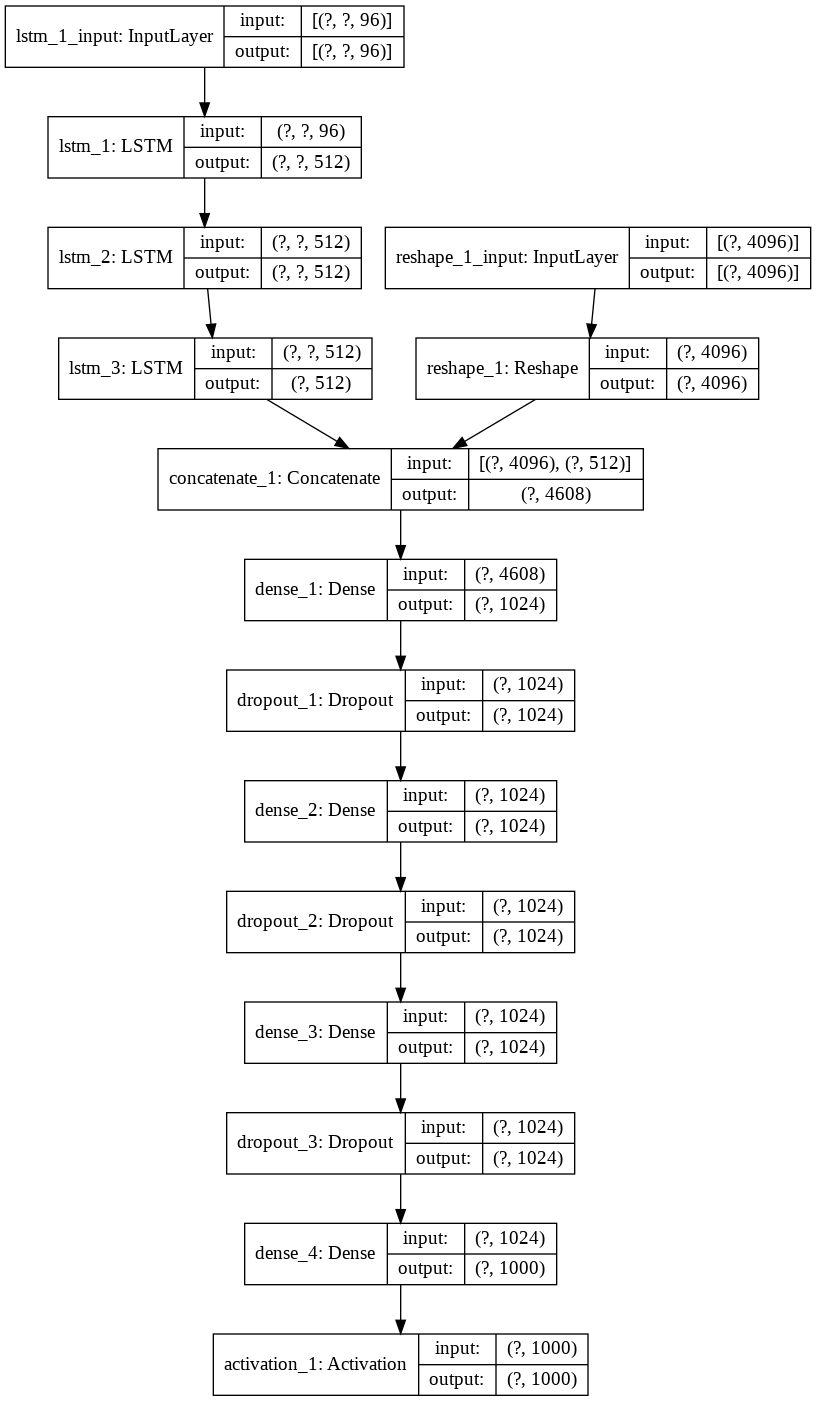

In [0]:
# Plot the model

tf.keras.utils.plot_model(features,'vggmodel19.png',show_shapes=True)

In [0]:
# Test the model on a random input

img= np.random.random((1,224,224,3)).astype('float32')
extracted_feature= features(img) 

InvalidArgumentError: ignored

#### Load the 'cool cat' picture

In Zambia’s South Luangwa National Park, a photographer had been watching a pride of lions while they slept off a feast from a buffalo kill. When this female walked away, he anticipated that she might be going for a drink and so he positioned his vehicle on the opposite side of the waterhole. The `cool cat` picture is one of the highly commended 2018 Image from Wildlife Photographer of the Year.

#### Import the picture

The dataset required for this tutorial can be downloaded from the following link:

https://drive.google.com/open?id=1myXpP8QFvhATqg0bPYhCpVS48_OgAC0L

You should store this file in Drive for use in this Colab notebook.

In [0]:
# Display the original image

import IPython.display as display
from PIL import Image

display.display(Image.open('path/to/cool_cat.jpg'))

#### Visualise network features from the input image

In [0]:
# Preprocess the image

from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image

img_path = 'path/to/cool_cat.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [0]:
# Extract the features



In [0]:
# Visualise the input channels



In [0]:
# Visualise some features in the first hidden layer



In [0]:
# Build a model to extract features by layer name



In [0]:
# Visualise some features from the extracted layer output



In [0]:
# Extract features from a layer deeper in the network



In [0]:
# Visualise some features from the extracted layer output



***
<a id="coding_tutorial_4"></a>
## Freezing layers

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Build the model

In [0]:
# Build a small Sequential model

from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

model = Sequential([
    layers.Dense(4, input_shape=(4,), activation='relu', kernel_initializer='random_uniform',
                 bias_initializer='ones'),
    layers.Dense(2, activation='relu', kernel_initializer='lecun_normal', bias_initializer='ones'),
    layers.Dense(4, activation='softmax'),
])

In [0]:
# Display the model summary

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_19 (Dense)             (None, 2)                 10        
_________________________________________________________________
dense_20 (Dense)             (None, 4)                 12        
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


#### Examine the weight matrix variation over training

In [0]:
def get_weight(model):
  return  [i.weights[0].numpy() for i in model.layers]
def get_baises(model):
  return [i.bias.numpy() for i in model.layers]

def plot_delta_weigths(W0_layers,b0_layers,W1_layers,b1_layers):
  plt.figure(figsize=(8,8))
  for n in range(3):
    delta_l = W1_layers[n] - W0_layers[n]
    print('Layer '+str(n)+': bias variation: ', np.linalg.norm(b1_layers[n] - b0_layers[n]))
    ax = plt.subplot(1,3,n+1)
    plt.imshow(delta_l)
    plt.title('Layer '+str(n))
    plt.axis('off')
  plt.colorbar()
  plt.suptitle('Weight matrices variation');


In [0]:
# Retrieve the weights and biases
W0_layers=   get_weight(model)
b0_layers= get_baises(model)

print(W0_layers)
print(b0_layers)

[array([[ 0.02896306, -0.02755425,  0.00142208, -0.02633201],
       [-0.00382893,  0.00912052, -0.03680326,  0.04653095],
       [ 0.00481755, -0.03832331, -0.01607125, -0.02975588],
       [ 0.0420729 ,  0.0400652 , -0.02054224, -0.03272428]],
      dtype=float32), array([[-0.19298436,  1.0937778 ],
       [ 0.9572848 , -0.40117297],
       [ 0.06392724, -1.0479681 ],
       [-0.03899091,  0.34889653]], dtype=float32), array([[ 0.54455805,  0.3702829 , -0.4318769 , -0.5413821 ],
       [ 0.62085485, -0.8809583 , -0.52871203,  0.65036297]],
      dtype=float32)]
[array([1., 1., 1., 1.], dtype=float32), array([1., 1.], dtype=float32), array([0., 0., 0., 0.], dtype=float32)]


In [0]:
# Construct a synthetic dataset

x_train = np.random.random((100, 4))
y_train = x_train

x_test = np.random.random((20, 4))
y_test = x_test

In [0]:
# Compile and fit the model

model.compile(optimizer='adam',
              loss='mse',
              metrics=['acc'])

model.fit(x_train, y_train, epochs=50, verbose=False);

In [0]:
# Retrieve weights and biases
W1_layers=   get_weight(model)
b1_layers= get_baises(model)
W1_layers

[array([[ 0.01973882, -0.17455298,  0.03219581, -0.02941319],
        [-0.13095772, -0.02027263,  0.10058106, -0.06648618],
        [-0.07281155, -0.20265429,  0.09722418, -0.08101358],
        [ 0.02977545, -0.13833955,  0.03802278, -0.02533007]],
       dtype=float32), array([[-0.32858735,  1.0032998 ],
        [ 0.83088684, -0.4954411 ],
        [-0.09184155, -1.1530228 ],
        [-0.17482199,  0.25385237]], dtype=float32), array([[ 0.43451974,  0.4272537 , -0.26944032, -0.42871717],
        [ 0.5410345 , -0.83706754, -0.40384224,  0.7354176 ]],
       dtype=float32)]

Layer 0: bias variation:  0.21008812
Layer 1: bias variation:  0.1756978
Layer 2: bias variation:  0.26971903


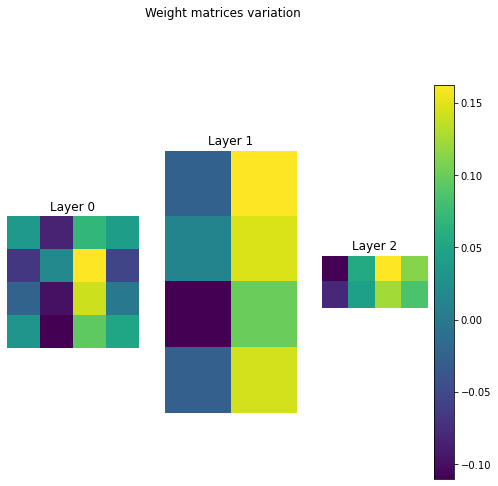

In [0]:
plot_delta_weigths(W0_layers,b0_layers,W1_layers,b1_layers)


#### Freeze layers at build time
# If trainable parameter in model = true (default), make that weights of each layer trained
# If trainable parameter in model = False in model definition makes the weights of each layer non trainable, will be freezed , even if the model get compiled.

# this will help during transfer learning of model, user can choose which layer need to be trained during training process.

In [0]:
# Count the trainable and non trainable variables before the freezing

n_trainable_var= len(model.trainable_variables)
n_non_trainable_var= len(model.non_trainable_variables)

In [0]:
# Display the number of trainable and non trainable variables before the freezing

print("\n Before freezing:\n\t Number of trainable variables: ", n_trainable_var,
                         "\n\t Number of non trainable variables: ", n_non_trainable_var)


 Before freezing:
	 Number of trainable variables:  6 
	 Number of non trainable variables:  0


In [0]:
# Build the model


model = Sequential([
    layers.Dense(4, input_shape=(4,), activation='relu', kernel_initializer='random_uniform',
                 bias_initializer='ones',trainable=False),
    layers.Dense(2, activation='relu', kernel_initializer='lecun_normal', bias_initializer='ones',trainable=False),
    layers.Dense(4, activation='softmax'),
])

In [0]:
# Count the trainable and non trainable variables after the freezing
n_trainable_var= len(model.trainable_variables)
n_non_trainable_var= len(model.non_trainable_variables)


In [0]:
# Display the number of trainable and non trainable variables after the freezing

print("\n After freezing:\n\t Number of trainable variables: ", n_trainable_var,
                         "\n\t Number of non trainable variables: ", n_non_trainable_var)

# since i have defined in first 2 layers trainable =False, those layers wieght, biases will not get update during training


 After freezing:
	 Number of trainable variables:  2 
	 Number of non trainable variables:  4


In [0]:
# Retrieve weights and biases
W0_layers=   get_weight(model)
b0_layers= get_baises(model)
W0_layers


[array([[ 0.01981017,  0.00606935, -0.01168485,  0.03379587],
        [ 0.04215306, -0.03186344,  0.00886996, -0.02933003],
        [-0.03579874,  0.00051613, -0.0255821 ,  0.02864932],
        [-0.02672867, -0.02550622, -0.04941775,  0.03688914]],
       dtype=float32), array([[-0.16768168,  0.08087689],
        [ 0.14791672, -0.3926887 ],
        [ 0.8552104 , -0.23607022],
        [-0.44483775, -0.2188714 ]], dtype=float32), array([[ 0.3848288 , -0.06348252,  0.04111791, -0.10273886],
        [-0.9245703 , -0.2661109 , -0.03821325, -0.13239479]],
       dtype=float32)]

In [0]:
# Compile and fit the model

model.compile(optimizer='adam',
              loss='mse',
              metrics=['acc'])

model.fit(x_train, y_train, epochs=50, verbose=False);

In [0]:
# Retrieve weights and biases

W1_layers=   get_weight(model)
b1_layers= get_baises(model)
W1_layers

[array([[ 0.01981017,  0.00606935, -0.01168485,  0.03379587],
        [ 0.04215306, -0.03186344,  0.00886996, -0.02933003],
        [-0.03579874,  0.00051613, -0.0255821 ,  0.02864932],
        [-0.02672867, -0.02550622, -0.04941775,  0.03688914]],
       dtype=float32), array([[-0.16768168,  0.08087689],
        [ 0.14791672, -0.3926887 ],
        [ 0.8552104 , -0.23607022],
        [-0.44483775, -0.2188714 ]], dtype=float32), array([[ 0.2792307 , -0.01683161,  0.06286263, -0.02354203],
        [-1.0330974 , -0.21358022, -0.02537948, -0.045102  ]],
       dtype=float32)]

Layer 0: bias variation:  0.0
Layer 1: bias variation:  0.0
Layer 2: bias variation:  0.14251539


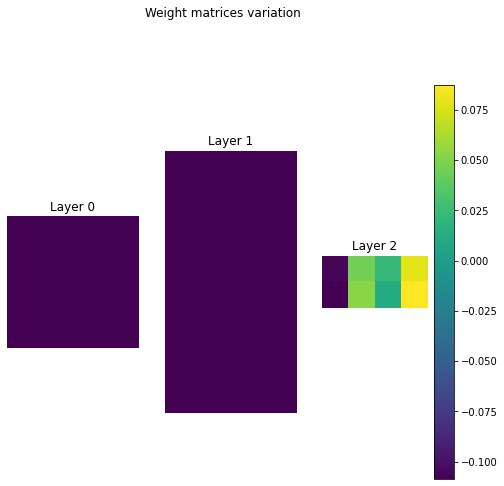

In [0]:
# Plot the variation

plot_delta_weigths(W0_layers,b0_layers,W1_layers,b1_layers)

#### Freeze layers of a pre-built model

In [0]:
# Count the trainable and non trainable variables before the freezing

print("\n Before freezing:\n\t Number of trainable variables: ", len(model.trainable_variables),
                         "\n\t Number of non trainable variables: ", len(model.non_trainable_variables))


 Before freezing:
	 Number of trainable variables:  4 
	 Number of non trainable variables:  2


In [0]:
# Freeze the First layer
model = Sequential([
    layers.Dense(4, input_shape=(4,), activation='relu', kernel_initializer='random_uniform',
                 bias_initializer='ones',trainable=False),
    layers.Dense(2, activation='relu', kernel_initializer='lecun_normal', bias_initializer='ones'),
    layers.Dense(4, activation='softmax'),
])


In [0]:
# Count the trainable and non trainable variables after the freezing

print("\n After freezing:\n\t Number of trainable variables: ", len(model.trainable_variables),
                        "\n\t Number of non trainable variables: ", len(model.non_trainable_variables))


 After freezing:
	 Number of trainable variables:  4 
	 Number of non trainable variables:  2


In [0]:
W0_layers=   get_weight(model)
b0_layers= get_baises(model)

In [0]:
# Compile and fit the model

model.compile(optimizer='adam',
              loss='mse',
              metrics=['acc'])

model.fit(x_train, y_train, epochs=50, verbose=False);

In [0]:
# Retrieve weights and biases



W1_layers=   get_weight(model)
b1_layers= get_baises(model)




Layer 0: bias variation:  0.0
Layer 1: bias variation:  0.12313576
Layer 2: bias variation:  0.2254837


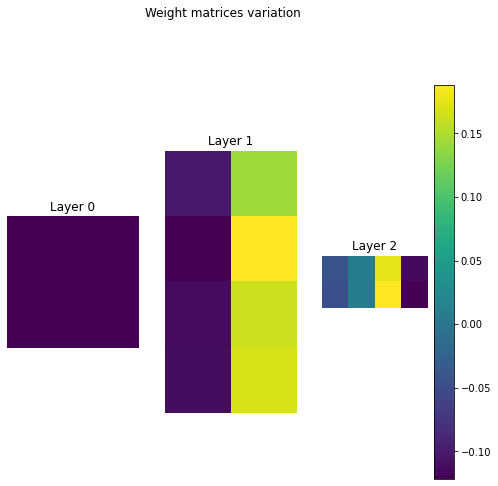

In [0]:
# Plot the variation

plot_delta_weigths(W0_layers,b0_layers,W1_layers,b1_layers)

In [0]:
# Since first dense layer in seq model , trainable= false, those weights are not trained before & after model compile.
so in plot that layer is filled with same color. whereas layer 2,3  weights got updated as per model so there is chnage in color in layers